In [1]:
#import libraries to read, modify, and visualize data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
#Change your working directory

os.chdir('/Users/miguelvidal/Downloads/Data_Science_Workshop-main 3')

In [5]:
# Load the data
df = pd.read_csv('Oura_Ring _Sample.csv')

# Once the data is loaded, call the name of the dataframe to see what it looks like
df

,date,average_rhr,sleep_score,activity_score,readiness_score
0,12/17/18,NaN,NaN,93.0,NaN
1,12/18/18,59.750,84.0,99.0,93.0
2,12/19/18,57.375,75.0,98.0,68.0
3,12/20/18,52.625,82.0,98.0,87.0
4,12/21/18,57.375,80.0,96.0,82.0
...,...,...,...,...,...
603,10/31/20,73.000,71.0,98.0,58.0
604,11/1/20,73.000,72.0,97.0,73.0
605,11/2/20,73.000,80.0,95.0,70.0
606,11/3/20,73.000,85.0,97.0,69.0


In [6]:
#How do you find the sum of duplicate data for just one column?

df['activity_score'].duplicated().sum()

576

In [7]:
#How do you get the summary statistics for the data frame?

df.describe()

,average_rhr,sleep_score,activity_score,readiness_score
count,549.000000,549.000000,604.000000,575.000000
mean,71.564982,78.579235,92.417219,75.610435
std,17.020737,8.684642,6.966261,12.586339
min,45.750000,46.000000,54.000000,36.000000
25%,60.500000,71.000000,90.000000,70.000000
50%,73.000000,80.000000,94.500000,77.000000
75%,73.000000,85.000000,97.000000,85.000000
max,140.450000,98.000000,100.000000,96.000000


<AxesSubplot:>

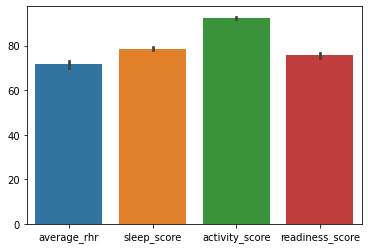

In [8]:
sns.barplot(data=df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

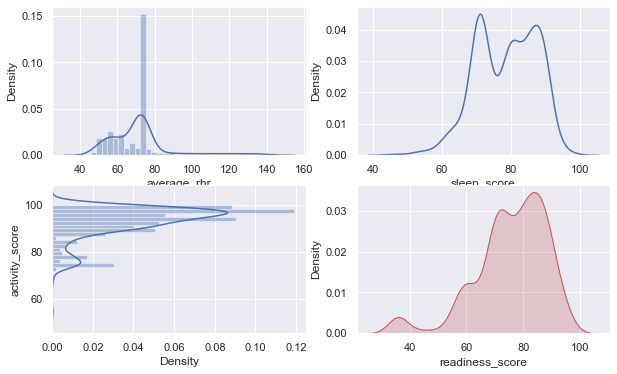

In [9]:
from pylab import *
sns.set(rc={"figure.figsize": (10, 6)})

subplot(2,2,1)
ax = sns.distplot(df['average_rhr'])

subplot(2,2,2)
ax = sns.distplot(df['sleep_score'], rug=False, hist=False)

subplot(2,2,3)
ax = sns.distplot(df['activity_score'], vertical=True)

subplot(2,2,4)
ax = sns.kdeplot(df['readiness_score'], shade=True, color="r")

plt.show()

In [10]:
# Number of NaN values

df.isna().sum()

date                0
average_rhr        59
sleep_score        59
activity_score      4
readiness_score    33
dtype: int64

<AxesSubplot:>

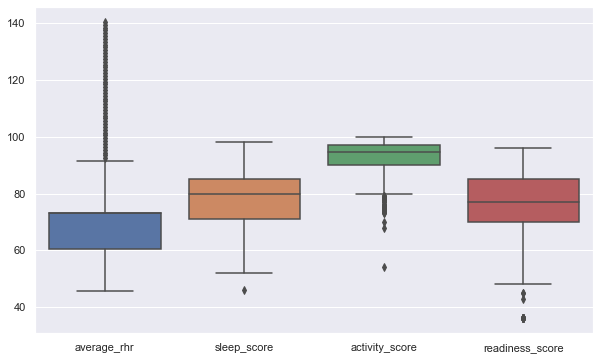

In [11]:
#Boxplot

sns.boxplot(data = df)

In [12]:
df.shape

(608, 5)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


average_rhr        12.5
sleep_score        14.0
activity_score      7.0
readiness_score    15.0
dtype: float64


In [14]:
print(Q3)

average_rhr        73.0
sleep_score        85.0
activity_score     97.0
readiness_score    85.0
Name: 0.75, dtype: float64


In [15]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

/var/folders/3z/0dr2lwhj54b64zfc9fdv_n580000gp/T/ipykernel_13813/2931615467.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


activity_score     59
average_rhr        49
date                0
readiness_score    23
sleep_score         1
dtype: int64

In [16]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

/var/folders/3z/0dr2lwhj54b64zfc9fdv_n580000gp/T/ipykernel_13813/3291663246.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(483, 5)

<AxesSubplot:>

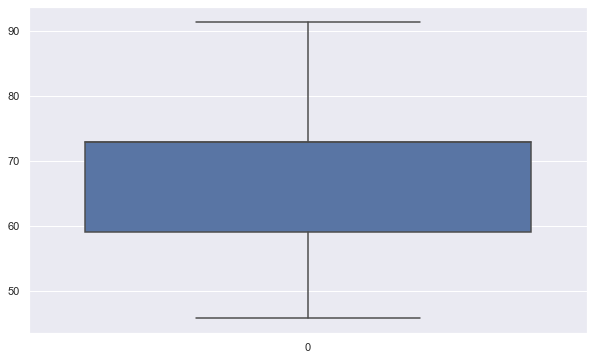

In [17]:
sns.boxplot(data = df_out['average_rhr'])

In [18]:
outliers = ((df_out < (Q1 - 1.5 * IQR)) | (df_out > (Q3 + 1.5 * IQR))).sum()
outliers

/var/folders/3z/0dr2lwhj54b64zfc9fdv_n580000gp/T/ipykernel_13813/3120957156.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_out < (Q1 - 1.5 * IQR)) | (df_out > (Q3 + 1.5 * IQR))).sum()


activity_score     0
average_rhr        0
date               0
readiness_score    0
sleep_score        0
dtype: int64

## The reason 0 is showing when there is visually an outlier is because Q1 and Q3 were calculated with the df where outliers were still included.

In [19]:
df_out.corr()

,average_rhr,sleep_score,activity_score,readiness_score
average_rhr,1.000000,-0.171625,0.223243,-0.454090
sleep_score,-0.171625,1.000000,-0.128925,0.371267
activity_score,0.223243,-0.128925,1.000000,-0.218485
readiness_score,-0.454090,0.371267,-0.218485,1.000000


In [20]:
df_corr = df_out.corr()

<AxesSubplot:>

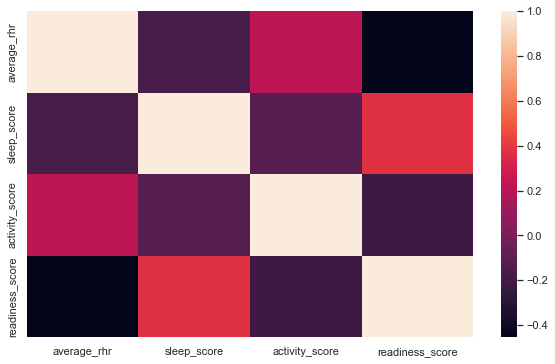

In [21]:
sns.heatmap(df_corr)

## Adding r coefficient to matrix

<AxesSubplot:>

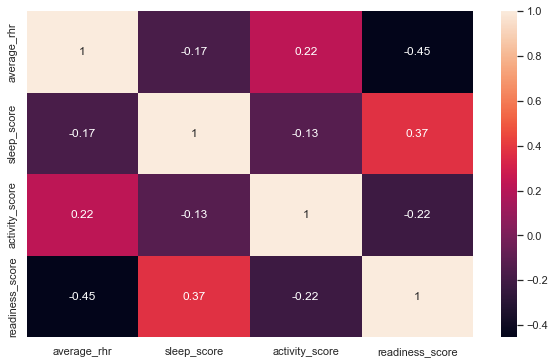

In [22]:
sns.heatmap(df_corr, annot = True)

## Add line of best fit to scatter plot

<AxesSubplot:xlabel='sleep_score', ylabel='readiness_score'>

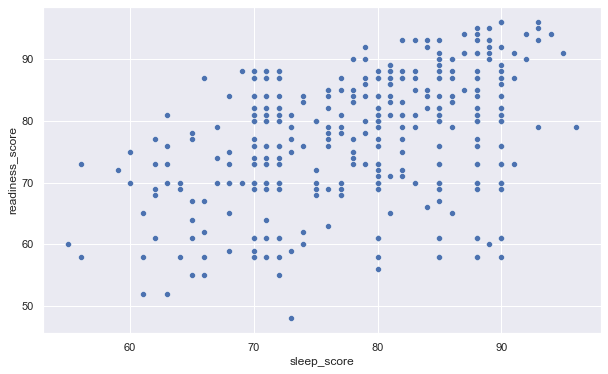

In [23]:
sns.scatterplot(data = df_out, x = 'sleep_score', y = 'readiness_score')

### Adding the line - sns.regplot is used to plot the regression line

<AxesSubplot:xlabel='sleep_score', ylabel='readiness_score'>

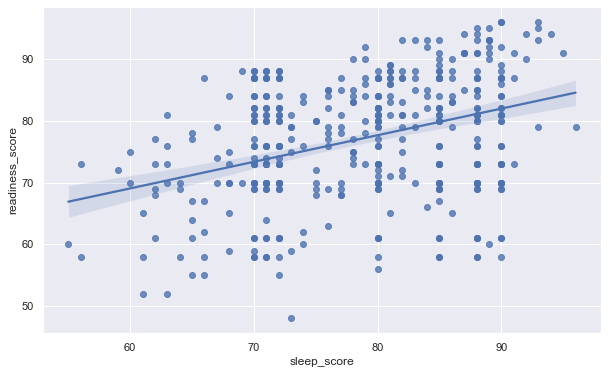

In [24]:
sns.regplot(data = df_out, x = 'sleep_score', y = 'readiness_score')